# 散戶策略

### 基礎設定

- 商品：台指期 (大台)

- 樣本區間：2014/01/01 ~ 2024/12/31
  - 樣本內：2014/01/01 ~ 2022/12/31
  - 樣本外：2023/01/01 ~ 2024/12/31
  - 只做日盤，不做夜盤

In [2]:
import time
import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.style.use('ggplot')    # 固定繪圖樣式

In [ ]:
# 讀取台指期股價資料

df = pd.read_csv("FITX.csv")
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
df = df.set_index(['Date'])
df.head(25)

,Open,High,Low,Close,Volume
Date,,,,,
1998-09-15,6819.0,6850.0,6780.0,6825.0,612.0
1998-09-16,6950.0,6995.0,6815.0,6995.0,732.0
1998-09-17,6945.0,6964.0,6892.0,6906.0,1979.0
1998-09-18,6840.0,6876.0,6832.0,6842.0,1470.0
1998-09-19,6859.0,7040.0,6855.0,7039.0,2339.0
1998-09-21,7035.0,7060.0,6850.0,6861.0,2307.0
1998-09-22,6930.0,6958.0,6855.0,6926.0,1715.0
1998-09-23,6900.0,6946.0,6850.0,6852.0,1773.0
1998-09-24,6940.0,6940.0,6870.0,6890.0,1403.0


In [4]:
# 指標計算

df['MA5'] = df['Close'].rolling(window=5, center=False).mean()
df['MA20'] = df['Close'].rolling(window=20, center=False).mean()

In [5]:
df['Year'] = df.index.year
df['Month'] = df.index.month

### 觀察資料

Text(0.5, 1.0, 'FITX')

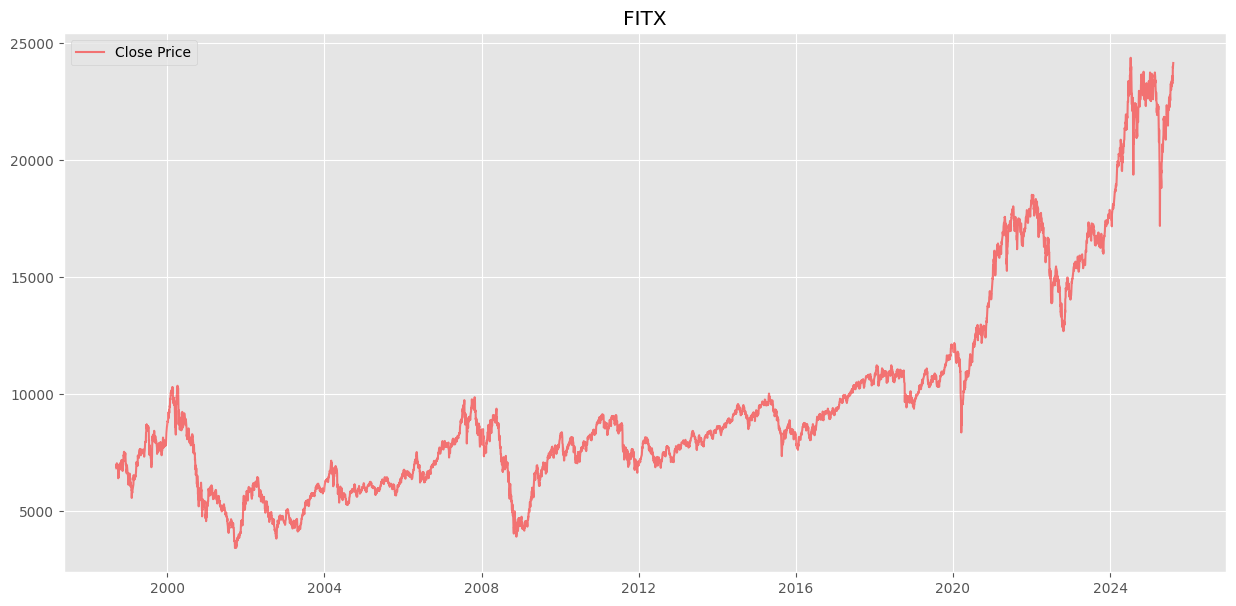

In [6]:
# 股價走勢圖
plt.figure(figsize=(15, 7))
plt.plot(df['Close'], color='red', alpha=0.5, label='Close Price')
plt.legend(loc='upper left')
plt.title('FITX')

Text(0.5, 1.0, 'Volume of each months')

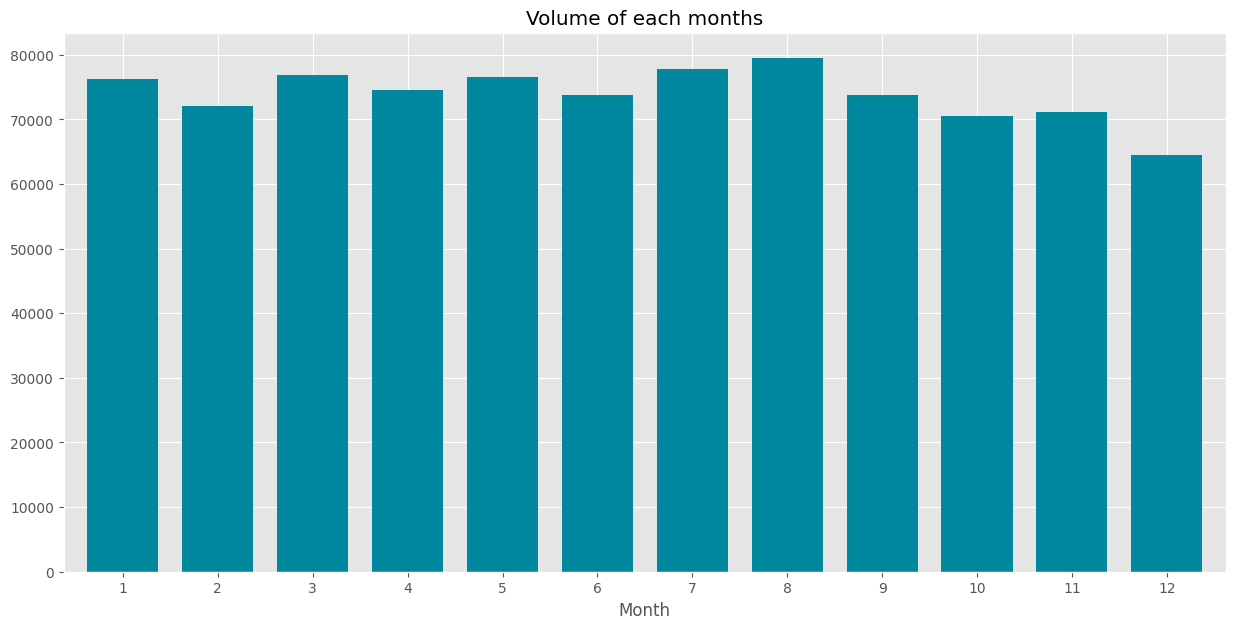

In [7]:
# 每月成交量資訊
plt.figure(figsize=(15, 7))
df.groupby(['Month'])['Volume'].mean().plot(kind='bar', width=0.75, color='#01889f')
plt.xticks(rotation=0)
plt.title('Volume of each months')

Text(0.5, 1.0, 'Volume of each years')

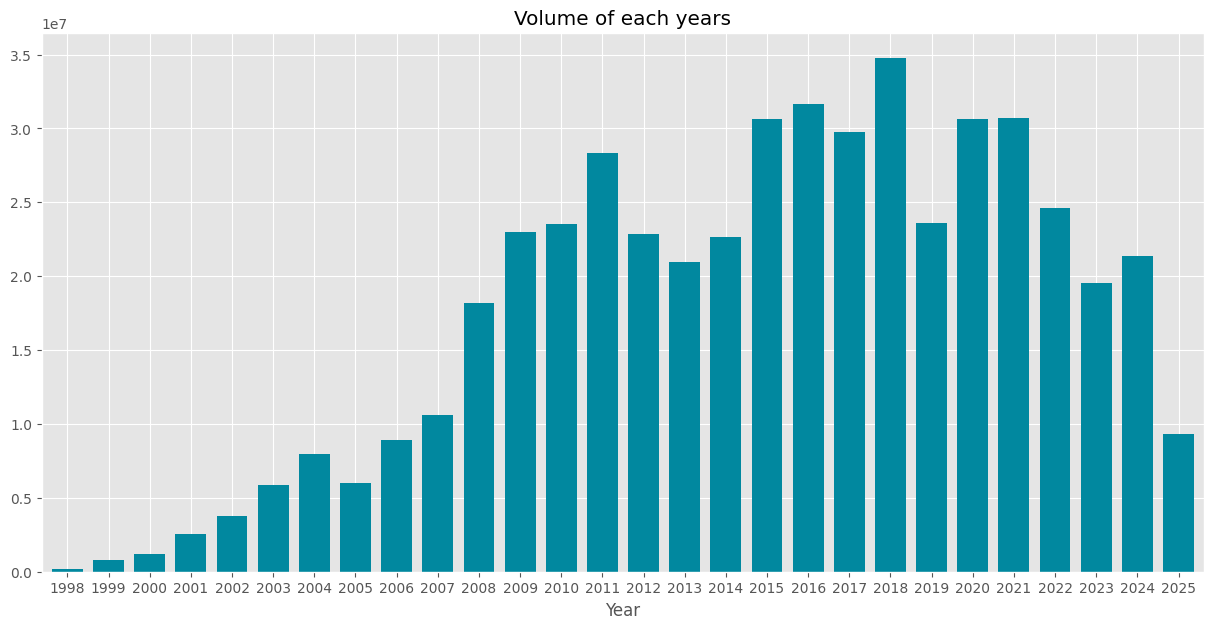

In [8]:
# 每年成交量資訊
plt.figure(figsize=(15, 7))
df.groupby(['Year'])['Volume'].sum().plot(kind='bar', width=0.75, color='#01889f')
plt.xticks(rotation=0)
plt.title('Volume of each years')

### 選擇回測區間

- 2015/01/01 ～ 2025/06/30

In [9]:
# 固定參數

Data = df[(df.index >= '2015-01-01 00:00:00') & (df.index <= '2025-06-30 00:00:00')].copy()
Data

,Open,High,Low,Close,Volume,MA5,MA20,Year,Month
Date,,,,,,,,,
2015-01-05,9238.0,9276.0,9155.0,9250.0,120487.0,9276.2,9114.00,2015,1
2015-01-06,9144.0,9153.0,9017.0,9058.0,148125.0,9236.8,9107.60,2015,1
2015-01-07,9042.0,9092.0,9033.0,9044.0,93314.0,9183.8,9103.25,2015,1
2015-01-08,9116.0,9259.0,9115.0,9256.0,131883.0,9177.8,9113.75,2015,1
2015-01-09,9328.0,9335.0,9217.0,9230.0,117874.0,9167.6,9124.80,2015,1
...,...,...,...,...,...,...,...,...,...
2025-06-24,21770.0,21966.0,21764.0,21959.0,69646.0,21818.4,21694.50,2025,6
2025-06-25,22138.0,22168.0,22017.0,22163.0,49936.0,21789.4,21741.60,2025,6
2025-06-26,22161.0,22263.0,22078.0,22115.0,59606.0,21871.8,21784.85,2025,6


### 取得結算日資料

In [ ]:
settlementDate_ = pd.read_csv("settlement_date.csv", encoding="utf-16")
settlementDate_.columns = ['settlementDate']

In [11]:
settlementDate_['settlementDate'] = pd.to_datetime(settlementDate_['settlementDate'].astype(str), format='%Y%m%d')

settlementDate__arr = np.array(settlementDate_['settlementDate'])    # 將索引(Date)新增至 array
settlementDate_arr = []
for i in settlementDate__arr :
    settlementDate_arr.append(pd.to_datetime(i).date())    # 只取得日期 "YYYY-MM-DD"

### 取得未平倉資料

In [ ]:
OI_ = pd.read_csv("FITX_OI_formatted.csv")
OI_['Date'] = pd.to_datetime(OI_['Date'], format='%Y-%m-%d')
OI_ = OI_.set_index(['Date'])

OI_['RetailLongRatio'] = (OI_['OI'] - OI_['MITLong']) / OI_['OI']
OI_['RetailShortRatio'] = (OI_['OI'] - OI_['MITShort']) / OI_['OI']
OI_['RetailRatio'] = OI_['RetailLongRatio'] - OI_['RetailShortRatio']

In [13]:
OI = OI_[(OI_.index >= '2015-01-01 00:00:00') & (OI_.index <= '2025-06-30 00:00:00')].copy()

### 回測假設

- 報酬計算：200 * 點數
- 手續費 + 滑價：單邊 600 元

- 結算日當天不進場
- 換月轉倉：結算日當天直接平倉

In [14]:
# 參數設定

Fund = 1000000    # 初始資金
FeePaid = 600    # 手續費 + 滑價
Length = 5    # MA 參數設定
LongPercent = 0.20    # 散戶偏多比例
ShortPercent = -0.20    # 散戶偏空比例

In [15]:
df_arr = np.array(Data)    # 將台指期資料從 pandas 轉為 numpy
time_arr = np.array(Data.index)    # 將索引(Date)新增至 array
date_arr = []
for i in time_arr :
    date_arr.append(pd.to_datetime(i).date())    # 只取得日期 "YYYY-MM-DD"

OI_arr = np.array(OI)

### 多空都做

In [16]:
BS = None    # 標記當前持倉狀態
buy = []    # 多單進場
sell = []    # 多單平倉
ExitPriceLongList = []
sellshort = []    # 空單進場
buytocover = []    # 空單平倉
ExitPriceShortList = []
profit_list = [0]    # 未實現損益
profit_fee_list = [0]    # 包含交易成本的累計損益
profit_fee_list_realized = [0] * len(df_arr)    # 已實現損益
profit_fee_list_realized_long = [0] * len(df_arr)    # 已實現損益(多單)
profit_fee_list_realized_short = [0] * len(df_arr)    # 已實現損益(空單)
rets = []    # 報酬率

##### 進場邏輯

- 做多
  - (Close > MA5) and (散戶淨多空比例 <= -20%)

- 做空
  - (Close < MA5) and (散戶淨多空比例 >= +20%)

- 結算日當天不進場

##### 出場邏輯

- 多單平倉
  - 移動式停損停利 or (Close < MA20)

- 空單平倉
  - 移動式停損停利 or (Close > MA20)

- 結算日當天平倉

In [17]:
for i in range(len(df_arr)) :

    # 如果 i = 最後一筆時，直接跳出迴圈
    if i == len(df_arr)-1 :
        break

    # 進場邏輯
    entryLong = (df_arr[i, 3] > df_arr[i, 5]) & (OI_arr[i, 5] <= ShortPercent)    # 做多
    entrySellShort = (df_arr[i, 3] < df_arr[i, 5]) & (OI_arr[i, 5] >= LongPercent)    # 做空
    entryCondition = date_arr[i+1] not in settlementDate_arr and date_arr[i] not in settlementDate_arr    # 結算日 不進場

    # 出場邏輯 (固定)
    exitCondition = date_arr[i] in settlementDate_arr    # 結算日 平倉

    # 未進場不用計算損益
    if BS == None :
        
        profit_list.append(0)
        profit_fee_list.append(0)
        profit_fee_list_realized[i] = 0
        profit_fee_list_realized_long[i] = 0
        profit_fee_list_realized_short[i] = 0

        # 做多進場
        if entryLong and entryCondition :
            BS = 'B'    # 狀態：做多
            t = i + 1
            buy.append(t)    # 隔天開盤進場
            HH = df_arr[t+1, 1]
            ExitPriceLong = min(df_arr[t, 2], df_arr[t-1, 2])
            ExitPriceLongList.append(ExitPriceLong)

            print("Enter Long Position")
            print(f"Time：{time_arr[t]}   Buy Price：{df_arr[t, 0]}")

        # 做空進場
        elif entrySellShort and entryCondition :
            BS = 'S'    # 狀態：做空
            t = i + 1
            sellshort.append(t)    # 隔天開盤進場
            LL = df_arr[t, 2]
            ExitPriceShort = max(df_arr[t, 1], df_arr[t-1, 2])
            ExitPriceShortList.append(ExitPriceShort)

            print("Enter Short Position")
            print(f"Time：{time_arr[t]}   Sell Price：{df_arr[t, 0]}")

    # 已進場開始計算未實現損益

    elif BS == 'B' :    # 多單
        
        profit = 200 * (df_arr[i, 3] - df_arr[t, 0])    # 開始計算每日漲跌幅
        profit_list.append(profit)

        # 出場條件達成，計算已實現損益
        if df_arr[i, 3] < ExitPriceLongList[-1] or i == len(df_arr)-2 or exitCondition :
            pl_round = 200 * (df_arr[i, 3] - df_arr[t, 0])    # 已實現損益
            profit_fee = profit - (FeePaid * 2)    # 已實現損益(含手續費)
            profit_fee_list.append(profit_fee)
            sell.append(i+1)
            BS = None

            print(f"time：{time_arr[i]}   Sell Price：{df_arr[i, 3]}\n")

            # 真實已實現損益
            profit_fee_realized = pl_round - (FeePaid * 2)
            profit_fee_list_realized[i] = profit_fee_realized
            profit_fee_list_realized_long[i] = profit_fee_realized
            rets.append(profit_fee_realized / (200 * df_arr[t, 0]))

        # 出場條件未達成，持續計算未實現損益
        else :

            if df_arr[i, 3] > HH :
                ExitPriceLong = min(df_arr[i, 2], df_arr[i-1, 2])
                ExitPriceLongList.append(ExitPriceLong)
            else :
                ExitPriceLong = ExitPriceLongList[-1]
                ExitPriceLongList.append(ExitPriceLong)

            if df_arr[i, 1] > HH :
                HH = df_arr[i, 1]
            else :
                HH = HH

            profit_fee = profit - (FeePaid * 2)
            profit_fee_list.append(profit_fee)
            profit_fee_list_realized[i] = 0
            profit_fee_list_realized_long[i] = 0


    elif BS == 'S' :    # 空單

        profit = 200 * (df_arr[t, 0] - df_arr[i, 3])    # 開始計算每日漲跌幅
        profit_list.append(profit)

        # 出場條件達成，計算已實現損益
        if df_arr[i, 3] > ExitPriceShortList[-1] or i == len(df_arr)-2 or exitCondition :
            pl_round = 200 * (df_arr[t, 0] - df_arr[i, 3])    # 已實現損益
            profit_fee = profit - (FeePaid * 2)    # 已實現損益(含手續費)
            profit_fee_list.append(profit_fee)
            buytocover.append(i)
            BS = None
            

            print(f"time：{time_arr[i]}   BuyCover Price：{df_arr[i, 3]}\n")

            # 真實已實現損益
            profit_fee_realized = pl_round - (FeePaid * 2) 
            profit_fee_list_realized[i] = profit_fee_realized
            profit_fee_list_realized_short[i] = profit_fee_realized
            rets.append(profit_fee_realized / (200 * df_arr[t, 0]))
        
        # 出場條件未達成，持續計算未實現損益
        else :

            if df_arr[i, 3] < LL :
                ExitPriceShort = max(df_arr[i, 1], df_arr[i-1, 1])
                ExitPriceShortList.append(ExitPriceShort)
            else :
                ExitPriceShort = ExitPriceShortList[-1]
                ExitPriceShortList.append(ExitPriceShort)

            if df_arr[i, 2] < LL :
                LL = df_arr[i, 2]
            else :
                LL = LL

            profit_fee = profit
            profit_fee_list.append(profit_fee)
            profit_fee_list_realized[i] = 0
            profit_fee_list_realized_short[i] = 0

Enter Short Position
Time：2015-01-08T00:00:00.000000000   Sell Price：9116.0
time：2015-01-20T00:00:00.000000000   BuyCover Price：9267.0

Enter Long Position
Time：2015-02-26T00:00:00.000000000   Buy Price：9691.0
time：2015-03-02T00:00:00.000000000   Sell Price：9631.0

Enter Short Position
Time：2015-03-27T00:00:00.000000000   Sell Price：9609.0
time：2015-04-02T00:00:00.000000000   BuyCover Price：9614.0

Enter Short Position
Time：2015-04-09T00:00:00.000000000   Sell Price：9579.0
time：2015-04-15T00:00:00.000000000   BuyCover Price：9520.0

Enter Long Position
Time：2015-04-17T00:00:00.000000000   Buy Price：9619.0
time：2015-05-05T00:00:00.000000000   Sell Price：9848.0

Enter Short Position
Time：2015-05-13T00:00:00.000000000   Sell Price：9712.0
time：2015-05-20T00:00:00.000000000   BuyCover Price：9668.0

Enter Short Position
Time：2015-05-22T00:00:00.000000000   Sell Price：9562.0
time：2015-05-26T00:00:00.000000000   BuyCover Price：9659.0

Enter Short Position
Time：2015-06-02T00:00:00.000000000   Se

### 績效呈現

- 所有交易 (多單 + 空單)

<Axes: title={'center': 'Profit'}, xlabel='Date'>

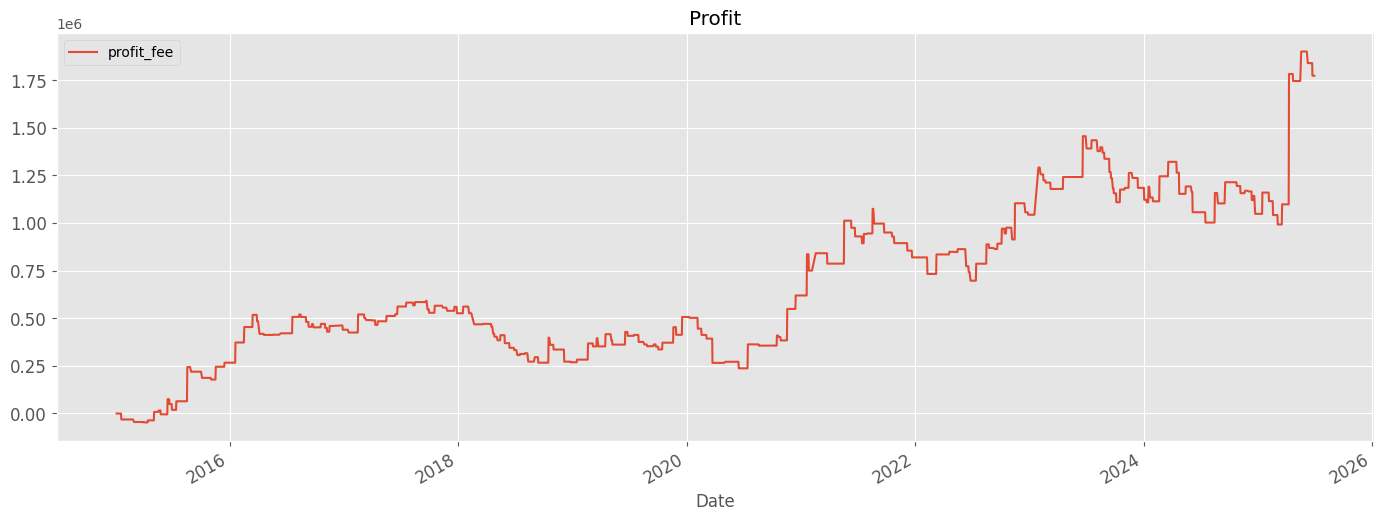

In [18]:
equity = pd.DataFrame({'profit_fee' : np.cumsum(profit_fee_list_realized)}, index=Data.index)
equity.plot(title='Profit', figsize=(17, 6), grid=True, fontsize=12)

In [19]:
# 所有交易績效

equity['equity'] = equity['profit_fee'] + Fund    # 總實際金額損益
equity['ret'] = profit_fee_list_realized / df_arr[:, 0]
equity['drawdown'] = equity['equity'] - equity['equity'].cummax()    # MDD(NTD)
equity['drawdown_percent'] = (equity['equity'] / equity['equity'].cummax()) - 1    # MDD(%)

equity

,profit_fee,equity,ret,drawdown,drawdown_percent
Date,,,,,
2015-01-05,0.0,1000000.0,0.000000,0.0,0.000000
2015-01-06,0.0,1000000.0,0.000000,0.0,0.000000
2015-01-07,0.0,1000000.0,0.000000,0.0,0.000000
2015-01-08,0.0,1000000.0,0.000000,0.0,0.000000
2015-01-09,0.0,1000000.0,0.000000,0.0,0.000000
...,...,...,...,...,...
2025-06-24,1774000.0,2774000.0,-3.031695,-127000.0,-0.043778
2025-06-25,1774000.0,2774000.0,0.000000,-127000.0,-0.043778
2025-06-26,1774000.0,2774000.0,0.000000,-127000.0,-0.043778


<Axes: title={'center': 'Profit'}, xlabel='Date'>

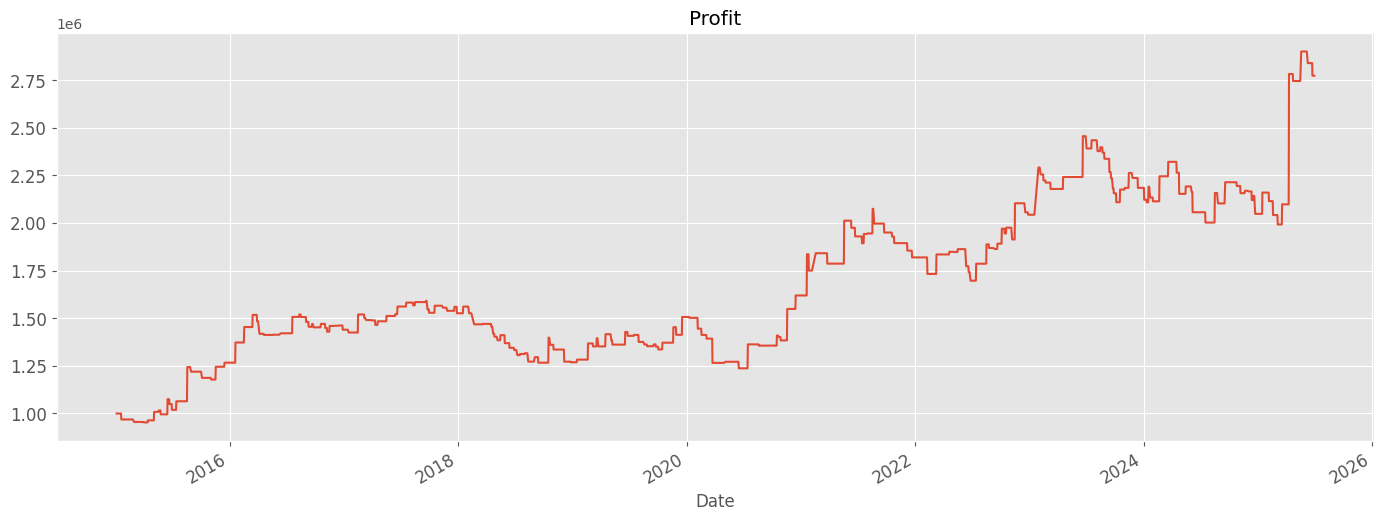

In [20]:
equity['equity'].plot(title='Profit', figsize=(17, 6), grid=True, fontsize=12)

- 畫圖

In [21]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  
plt.rcParams['axes.unicode_minus'] = False  # 避免負號顯示成方塊

In [22]:
time_index = np.array(date_arr)    # 時間軸 
equity_curve = np.array(equity['profit_fee'])    # 淨利曲線 
drawdown = np.array(equity['drawdown'])    # MDD 
drawdown_percent = np.array(equity['drawdown_percent'])

peak = np.maximum.accumulate(equity_curve) 
new_high_mask = equity_curve == peak

C:\Users\micha\AppData\Local\Temp\ipykernel_27260\2226071734.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


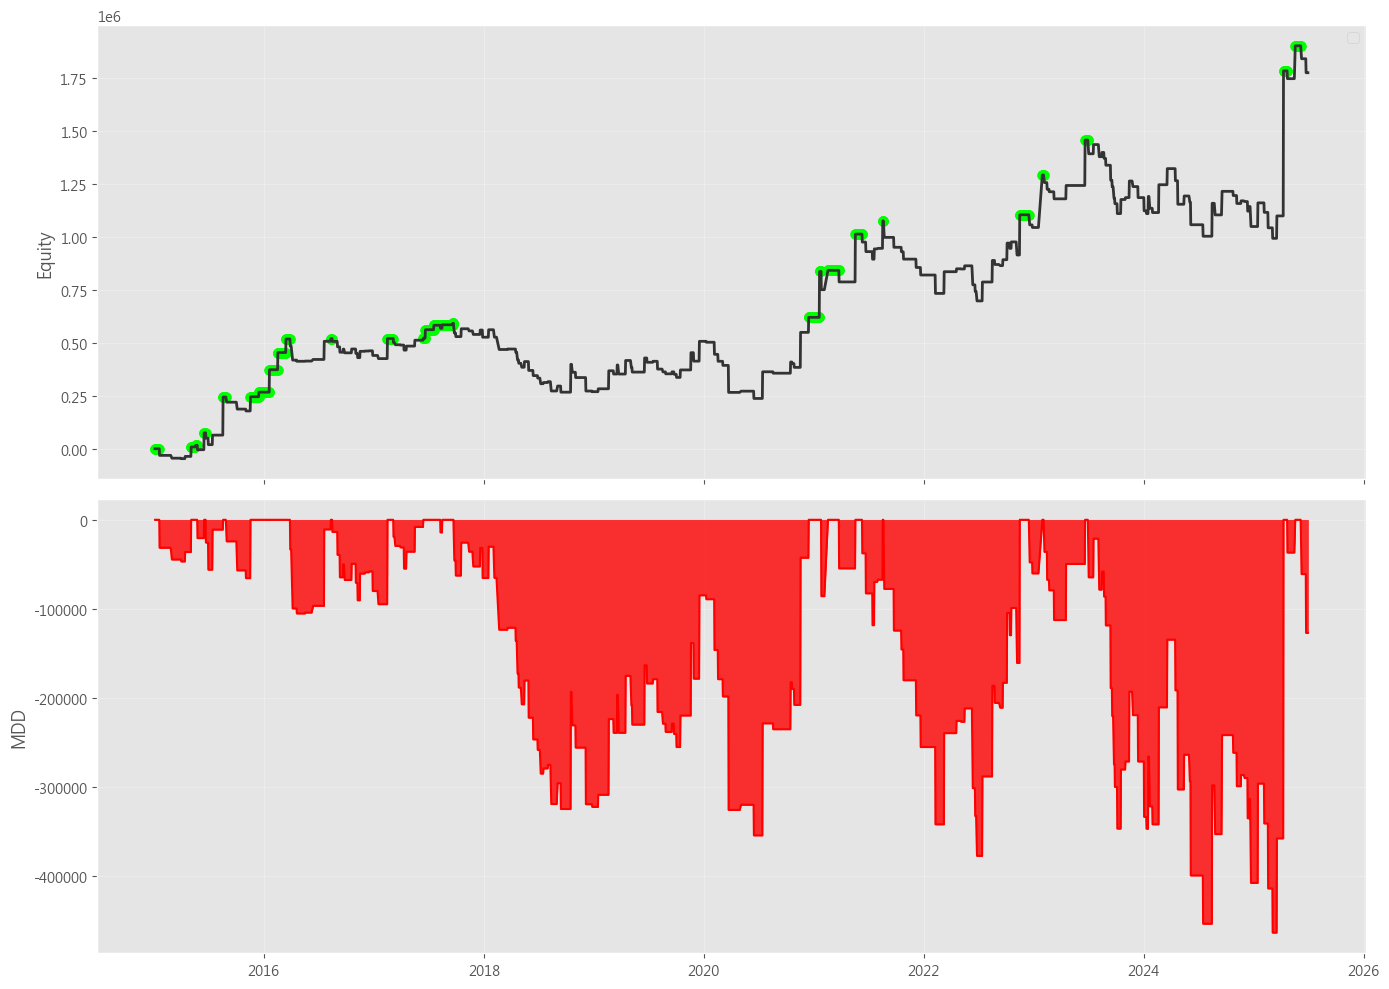

In [23]:
# 繪圖
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# 主圖
ax1.plot(time_index, equity_curve, color='#333333', linewidth=2)
ax1.scatter(time_index[new_high_mask], equity_curve[new_high_mask], color='#00FF00', s=50)
ax1.set_ylabel('Equity')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 副圖1：MDD金額
ax2.plot(time_index, drawdown, color='red', linewidth=1.5)
ax2.fill_between(time_index, drawdown, 0, color='red', alpha=0.8)
ax2.set_ylabel('MDD')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
ret = (equity['equity'][-1] / equity['equity'][0] - 1) * 100    # 報酬率

profit = equity['profit_fee'].iloc[-1]    # 淨利
profit_gross = sum([i for i in profit_fee_list_realized if i>0])    # 毛利
profit_lossgross = sum([i for i in profit_fee_list_realized if i<0])    # 毛損
mdd = abs(equity['drawdown'].min())    # 最大回撤
mdd_percent = abs(equity['drawdown_percent'].min()) * 100    # 最大回撤(%)
max_loss_trade = min(profit_fee_list_realized)    # 單筆最大虧損金額
max_loss_percent = abs(equity['ret'].min()) * 100    # 單筆最大虧損百分比
largest_drawdown_return = (equity['equity'].cummax()).max() / (equity['equity'].min()).min()    # 從最大回撤的最低點恢復到新高點的報酬率
profitFactor = (profit_gross + profit_lossgross) / abs(profit_lossgross)    # 調整後獲利因子
tradeTimes = len(buy) + len(sellshort)    # 交易次數
winRate = (len([i for i in profit_fee_list_realized if i > 0]) / tradeTimes) * 100    # 勝率

print(f'----- 所有交易 -----')
print(f'淨利(NTD) : {round(profit)}')
print(f'毛利(NTD) : {round(profit_gross)}')
print(f'毛損(NTD) : {round(profit_lossgross)}')
print(f'最大策略虧損(NTD) : {round(mdd)}')
print(f'最大策略虧損(%) : {round(mdd_percent, 2)}')
print(f'最大平倉交易虧損(NTD) : {round(max_loss_trade)}')
print(f'最大平倉交易虧損(%) : {round(max_loss_percent, 2)}')
print(f'最大策略虧損報酬 : {round(largest_drawdown_return, 2)}')
print(f'調整後獲利因子 : {round(profitFactor, 2)}')
print(f'交易次數 : {tradeTimes}')
print(f'勝率(%) : {round(winRate, 2)}')

----- 所有交易 -----
淨利(NTD) : 1774000
毛利(NTD) : 6109400
毛損(NTD) : -4335400
最大策略虧損(NTD) : 463600
最大策略虧損(%) : 22.27
最大平倉交易虧損(NTD) : -127400
最大平倉交易虧損(%) : 1415.87
最大策略虧損報酬 : 3.04
調整後獲利因子 : 0.41
交易次數 : 211
勝率(%) : 41.23


- 多單

<Axes: title={'center': 'Profit_Long'}, xlabel='Date'>

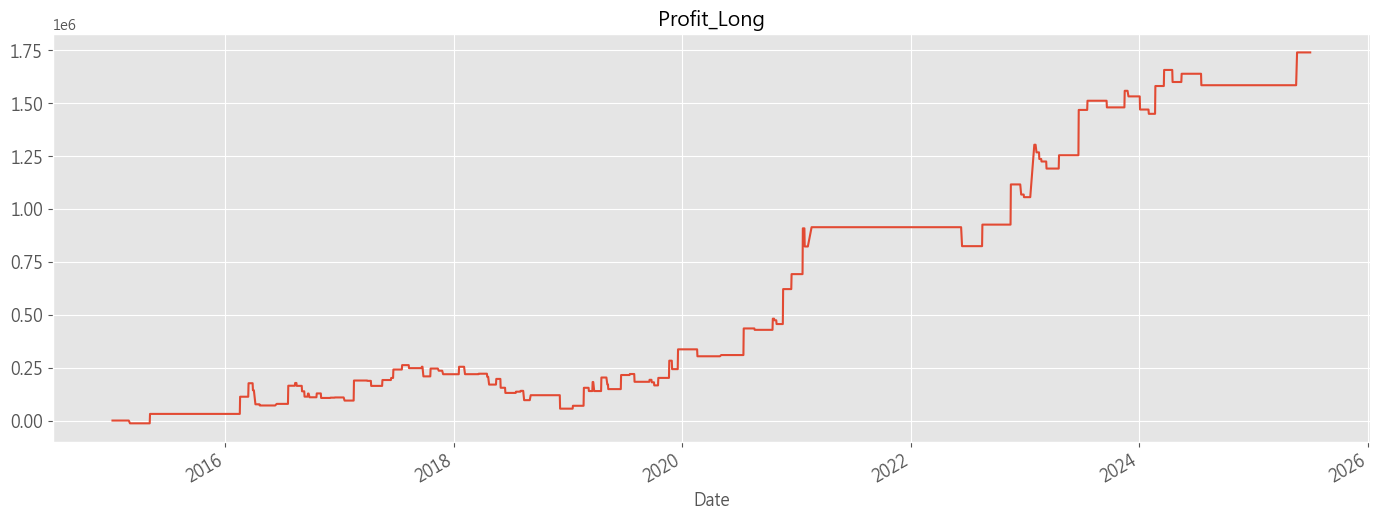

In [25]:
equity_long = pd.DataFrame({'profit_fee_long' : np.cumsum(profit_fee_list_realized_long)}, index=Data.index)    # 多單
equity_long.plot(title='Profit_Long', figsize=(17, 6), grid=True, fontsize=12, legend=False)

In [26]:
# 多單績效
equity_long['equity'] = equity_long['profit_fee_long'] + Fund    # 總實際金額損益
equity_long['ret'] = profit_fee_list_realized_long / df_arr[:, 0]
equity_long['drawdown'] = equity_long['equity'] - equity_long['equity'].cummax()    # MDD(NTD)
equity_long['drawdown_percent'] = (equity_long['equity'] / equity_long['equity'].cummax()) - 1    # MDD(%)

In [27]:
ret = (equity_long['equity'][-1] / equity_long['equity'][0] - 1) * 100    # 報酬率

profit = equity_long['profit_fee_long'].iloc[-1]    # 淨利
profit_gross = sum([i for i in profit_fee_list_realized_long if i>0])    # 毛利
profit_lossgross = sum([i for i in profit_fee_list_realized_long if i<0])    # 毛損
mdd = abs(equity_long['drawdown'].min())    # 最大回撤
mdd_percent = abs(equity_long['drawdown_percent'].min()) * 100    # 最大回撤(%)
max_loss_trade = min(profit_fee_list_realized_long)    # 單筆最大虧損金額
max_loss_percent = abs(equity_long['ret'].min()) * 100    # 單筆最大虧損百分比
largest_drawdown_return = (equity_long['equity'].cummax()).max() / (equity_long['equity'].min()).min()    # 從最大回撤的最低點恢復到新高點的報酬率
profitFactor = (profit_gross + profit_lossgross) / abs(profit_lossgross)    # 調整後獲利因子
tradeTimes = len(buy)    # 交易次數
winRate = (len([i for i in profit_fee_list_realized_long if i > 0]) / tradeTimes) * 100    # 勝率

print(f'----- 多單 -----')
print(f'淨利(NTD) : {round(profit)}')
print(f'毛利(NTD) : {round(profit_gross)}')
print(f'毛損(NTD) : {round(profit_lossgross)}')
print(f'最大策略虧損(NTD) : {round(mdd)}')
print(f'最大策略虧損(%) : {round(mdd_percent, 2)}')
print(f'最大平倉交易虧損(NTD) : {round(max_loss_trade)}')
print(f'最大平倉交易虧損(%) : {round(max_loss_percent, 2)}')
print(f'最大策略虧損報酬 : {round(largest_drawdown_return, 2)}')
print(f'調整後獲利因子 : {round(profitFactor, 2)}')
print(f'交易次數 : {tradeTimes}')
print(f'勝率(%) : {round(winRate, 2)}')

----- 多單 -----
淨利(NTD) : 1740200
毛利(NTD) : 3229800
毛損(NTD) : -1489600
最大策略虧損(NTD) : 205800
最大策略虧損(%) : 16.31
最大平倉交易虧損(NTD) : -89600
最大平倉交易虧損(%) : 772.9
最大策略虧損報酬 : 2.78
調整後獲利因子 : 1.17
交易次數 : 100
勝率(%) : 51.0


- 空單

<Axes: title={'center': 'Profit_Short'}, xlabel='Date'>

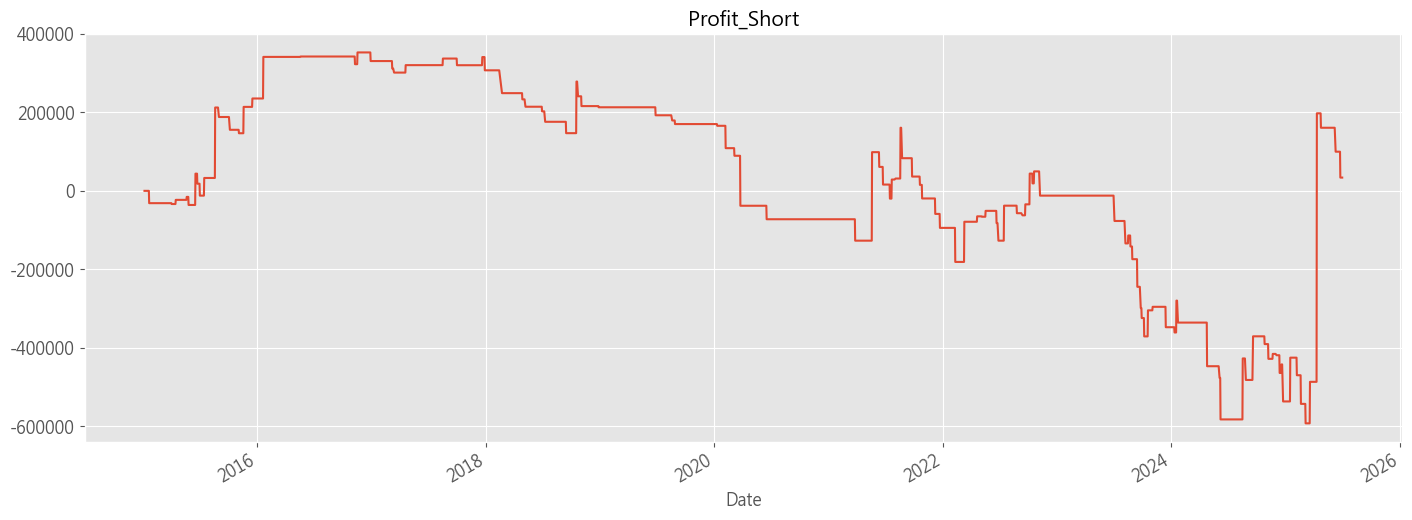

In [28]:
equity_short = pd.DataFrame({'profit_fee_short' : np.cumsum(profit_fee_list_realized_short)}, index=Data.index)    # 空單
equity_short.plot(title='Profit_Short', figsize=(17, 6), grid=True, fontsize=12, legend=False)

In [29]:
# 空單績效
equity_short['equity'] = equity_short['profit_fee_short'] + Fund    # 總實際金額損益
equity_short['ret'] = profit_fee_list_realized_short / df_arr[:, 0]
equity_short['drawdown'] = equity_short['equity'] - equity_short['equity'].cummax()    # MDD(NTD)
equity_short['drawdown_percent'] = (equity_short['equity'] / equity_short['equity'].cummax()) - 1    # MDD(%)

In [30]:
ret = (equity_short['equity'][-1] / equity_short['equity'][0] - 1) * 100    # 報酬率

profit = equity_short['profit_fee_short'].iloc[-1]    # 淨利
profit_gross = sum([i for i in profit_fee_list_realized_short if i>0])    # 毛利
profit_lossgross = sum([i for i in profit_fee_list_realized_short if i<0])    # 毛損
mdd = abs(equity_short['drawdown'].min())    # 最大回撤
mdd_percent = abs(equity_short['drawdown_percent'].min()) * 100    # 最大回撤(%)
max_loss_trade = min(profit_fee_list_realized_short)    # 單筆最大虧損金額
max_loss_percent = abs(equity_short['ret'].min()) * 100    # 單筆最大虧損百分比
largest_drawdown_return = (equity_short['equity'].cummax()).max() / (equity_short['equity'].min()).min()    # 從最大回撤的最低點恢復到新高點的報酬率
profitFactor = (profit_gross + profit_lossgross) / abs(profit_lossgross)    # 調整後獲利因子
tradeTimes = len(sellshort)    # 交易次數
winRate = (len([i for i in profit_fee_list_realized_short if i > 0]) / tradeTimes) * 100    # 勝率

print(f'----- 空單 -----')
print(f'淨利(NTD) : {round(profit)}')
print(f'毛利(NTD) : {round(profit_gross)}')
print(f'毛損(NTD) : {round(profit_lossgross)}')
print(f'最大策略虧損(NTD) : {round(mdd)}')
print(f'最大策略虧損(%) : {round(mdd_percent, 2)}')
print(f'最大平倉交易虧損(NTD) : {round(max_loss_trade)}')
print(f'最大平倉交易虧損(%) : {round(max_loss_percent, 2)}')
print(f'最大策略虧損報酬 : {round(largest_drawdown_return, 2)}')
print(f'調整後獲利因子 : {round(profitFactor, 2)}')
print(f'交易次數 : {tradeTimes}')
print(f'勝率(%) : {round(winRate, 2)}')

----- 空單 -----
淨利(NTD) : 33800
毛利(NTD) : 2879600
毛損(NTD) : -2845800
最大策略虧損(NTD) : 945400
最大策略虧損(%) : 69.88
最大平倉交易虧損(NTD) : -127400
最大平倉交易虧損(%) : 1415.87
最大策略虧損報酬 : 3.32
調整後獲利因子 : 0.01
交易次數 : 111
勝率(%) : 32.43
